In [6]:
!pip install chardet

     -------------------------------------- 199.4/199.4 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install nltk textblob


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import matplotlib.font_manager as fm

# 사용 가능한 폰트 리스트 출력
fonts = fm.findSystemFonts()
print(fonts)


['C:\\Windows\\Fonts\\CASTELAR.TTF', 'C:\\Windows\\Fonts\\JOKERMAN.TTF', 'C:\\Windows\\Fonts\\ERASBD.TTF', 'C:\\Windows\\Fonts\\COLONNA.TTF', 'C:\\Windows\\Fonts\\WINGDNG2.TTF', 'C:\\Windows\\Fonts\\segoeuib.ttf', 'C:\\Windows\\Fonts\\BOOKOS.TTF', 'C:\\Windows\\Fonts\\BOD_BLAI.TTF', 'C:\\Windows\\Fonts\\MTCORSVA.TTF', 'C:\\Windows\\Fonts\\corbelli.ttf', 'C:\\Windows\\Fonts\\taileb.ttf', 'C:\\Windows\\Fonts\\LEELAWAD.TTF', 'C:\\Windows\\Fonts\\framdit.ttf', 'C:\\Windows\\Fonts\\batang.ttc', 'C:\\Windows\\Fonts\\PERTILI.TTF', 'C:\\Windows\\Fonts\\palai.ttf', 'C:\\Windows\\Fonts\\ARLRDBD.TTF', 'C:\\Windows\\Fonts\\IMPRISHA.TTF', 'C:\\Windows\\Fonts\\HMFMMUEX.TTC', 'C:\\Windows\\Fonts\\ariblk.ttf', 'C:\\Windows\\Fonts\\segoescb.ttf', 'C:\\Windows\\Fonts\\phagspa.ttf', 'C:\\Windows\\Fonts\\LCALLIG.TTF', 'C:\\Windows\\Fonts\\GLSNECB.TTF', 'C:\\Windows\\Fonts\\BELLI.TTF', 'C:\\Windows\\Fonts\\H2SA1M.TTF', 'C:\\Windows\\Fonts\\CALISTI.TTF', 'C:\\Windows\\Fonts\\GILSANUB.TTF', 'C:\\Windows\\Fon

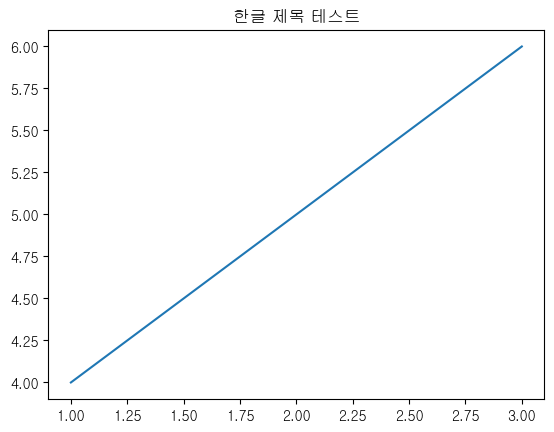

In [2]:
import matplotlib.pyplot as plt

# 폰트 경로 설정
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'  # 이 경로는 시스템에 따라 다를 수 있습니다.

# 폰트 이름 설정
plt.rc('font', family='gulim')

# 그래프 그리기 예제
plt.title('한글 제목 테스트')
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
import chardet

%matplotlib inline

# nltk 데이터 다운로드 (첫 실행 시 필요)
nltk.download('vader_lexicon')

# nltk 데이터 다운로드 (첫 실행 시 필요)
nltk.download('stopwords')

# 글꼴 경로 지정
font_path = "C:\\Windows\\Fonts\\gulim.ttc"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family='gulim')

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

raw = pd.read_csv('D:\에어비앤비\parisreview.csv')
df = raw.copy()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [4]:
df = df[['listing_id','date','comments']]

df = df.rename(columns= {
    'listing_id' : '숙소_id',
    'date': '리뷰날짜',
    'comments' : '리뷰'
})

# 리뷰 결측치 제거
df = df[~df['리뷰'].isnull()]

# 리뷰 내의 <br> 제거
df['리뷰'] = df['리뷰'].str.replace('<br>\s*', ' ', regex=True)
df['리뷰'] = df['리뷰'].str.replace('<br/>\s*', ' ', regex=True)

In [5]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# nltk 자원 다운로드 (VADER Lexicon)
nltk.download('vader_lexicon')


# 'comments' 열에서 NaN 값을 검사하고, 빈 문자열로 대체
df['리뷰'] = df['리뷰'].fillna('')

# 모든 리뷰를 문자열로 변환
df['리뷰'] = df['리뷰'].apply(str)

# 랜덤으로 100000개의 리뷰 샘플링
sampled_df = df.sample(n=100000, random_state=1)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# 감성 분석기 초기화
sia = SentimentIntensityAnalyzer()

# 감성 점수 계산 함수
def analyze_sentiment(review):
    if review:  # 비어있지 않은 경우에만 감성 분석 실행
        return sia.polarity_scores(review)
    else:
        return {'neu': 1.0}  # 비어있는 리뷰는 중립적으로 처리

# 리뷰 텍스트에 대한 감성 점수 적용
sampled_df['sentiment'] = sampled_df['리뷰'].apply(analyze_sentiment)

# 결과 출력
print(sampled_df[['리뷰', 'sentiment']])


                                                        리뷰  \
1377572  petit pied à terre pour quelques nuits. douche...   
1505068  Très bel appartement et surtout très bien situ...   
594937   Posizione centrale e ben servita , appartament...   
997822   Bertrand Et Marion were very responsive and he...   
1227473  Julie’s apartment was a dream! It has everythi...   
...                                                    ...   
1206726                                            Superbe   
736716   Super appart pour famille calme dedans anime d...   
1377047  Loved staying here. Teddy was really helpful, ...   
1578664  Quite a good option, it’s worth adding a photo...   
778498   This is a perfect solution if you are looking ...   

                                                 sentiment  
1377572  {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...  
1505068  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
594937   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
997822   {'

In [8]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# 데이터 로드 및 샘플링

sampled_df = df.sample(n=100000, random_state=1)

# SentimentIntensityAnalyzer 초기화
sid = SentimentIntensityAnalyzer()

# 감성 분석 함수 정의
def analyze_sentiment(comment):
    # VADER 감성 분석
    vader_scores = sid.polarity_scores(comment)
    # TextBlob 감성 분석
    analysis = TextBlob(comment)
    textblob_score = analysis.sentiment.polarity
    
    return vader_scores, textblob_score

# 감성 분석 결과 적용
results = sampled_df['리뷰'].apply(lambda x: analyze_sentiment(str(x)))
sampled_df[['vader_sentiment', 'textblob_sentiment']] = pd.DataFrame(results.tolist(), index=sampled_df.index)

# VADER 점수 세부 항목 분리
sampled_df['부정'] = sampled_df['vader_sentiment'].apply(lambda x: x['neg'])
sampled_df['중립'] = sampled_df['vader_sentiment'].apply(lambda x: x['neu'])
sampled_df['긍정'] = sampled_df['vader_sentiment'].apply(lambda x: x['pos'])
sampled_df['전체'] = sampled_df['vader_sentiment'].apply(lambda x: x['compound'])


In [9]:
df

,숙소_id,리뷰날짜,리뷰
0,39948,2013-09-20,Aliyah et Philippe m'ont réservé un accueil ex...
1,39948,2013-09-29,Aliyah and Philippe are gracious hosts and eve...
2,3109,2017-10-28,Tout s'est bien déroulé. Merci bien. PG
3,3109,2017-11-03,Un petit nid fouiller douillet situé dans app...
4,3109,2018-07-24,"Appartement spacieux, propre,clair, et calme à..."
...,...,...,...
1794001,1107872133955829208,2024-03-16,We had the best time staying at this apartment...
1794002,1109396868279302811,2024-03-15,On a passé un magnifique séjour dans l'apparte...
1794003,1108741370485532713,2024-03-10,Superbe découverte que cet appartement d Hugo ...
1794004,1109220943409848089,2024-03-14,El apartamento es mejor que en las fotos. Todo...


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# 필요한 nltk 리소스 다운로드
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# 모든 리뷰를 하나의 문자열로 결합
text = ' '.join(sampled_df['리뷰'].astype(str))

# 소문자 변환
text = text.lower()

# 텍스트 토큰화
tokens = word_tokenize(text)

# 불용어 제거
stop_words = set(stopwords.words('english'))  # 영어 불용어 설정, 필요에 따라 언어 변경 가능
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]


In [12]:
# 단어 빈도 계산
word_counts = Counter(tokens)

# 가장 흔한 20개 단어 추출
most_common_words = word_counts.most_common(20)

# 결과 출력
print(most_common_words)


[('de', 36619), ('apartment', 36561), ('et', 35994), ('great', 33532), ('très', 31429), ('paris', 29379), ('stay', 27738), ('location', 26651), ('place', 25007), ('la', 21780), ('est', 19946), ('à', 19253), ('un', 18382), ('bien', 16909), ('metro', 16086), ('le', 14848), ('host', 14423), ('would', 14376), ('us', 14087), ('nice', 13651)]


In [1]:
pip install matplotlib nltk wordcloud


     -------------------------------------- 300.0/300.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLTK 리소스 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 데이터 예제
sampled_df = pd.DataFrame({
    '리뷰': [
        "This product is great!",
        "Horrible service, will not come back.",
        "Okay, but not what I expected.",
        "Perfect, I loved it!",
        "Terrible, I hate it!"
    ],
    'compound': [0.64, -0.34, 0.01, 0.78, -0.76]
})

# 감성 분류
positive_reviews = sampled_df[sampled_df['compound'] > 0.1]['리뷰']
negative_reviews = sampled_df[sampled_df['compound'] < -0.1]['리뷰']
neutral_reviews = sampled_df[(sampled_df['compound'] >= -0.1) & (sampled_df['compound'] <= 0.1)]['리뷰']

# 토큰화 및 단어 빈도 계산 함수
def get_frequent_words(text_series):
    text = ' '.join(text_series).lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return Counter(filtered_tokens)

# 각 감성별 주요 단어 추출
positive_word_counts = get_frequent_words(positive_reviews)
negative_word_counts = get_frequent_words(negative_reviews)
neutral_word_counts = get_frequent_words(neutral_reviews)

# 상위 5개 단어 출력 예시
print("Positive words:", positive_word_counts.most_common(5))
print("Negative words:", negative_word_counts.most_common(5))
print("Neutral words:", neutral_word_counts.most_common(5))


Positive words: [('product', 1), ('great', 1), ('perfect', 1), ('loved', 1)]
Negative words: [('horrible', 1), ('service', 1), ('come', 1), ('back', 1), ('terrible', 1)]
Neutral words: [('okay', 1), ('expected', 1)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


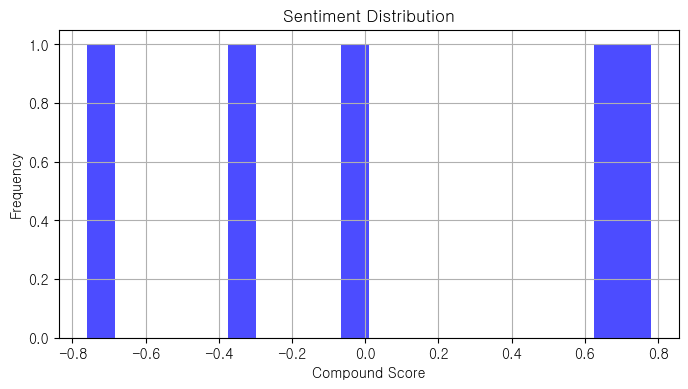

In [17]:
# 감성 점수 분포 차트
plt.figure(figsize=(8, 4))
plt.hist(sampled_df['compound'], bins=20, color='blue', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
pip install pandas requests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
sampled_df.columns

Index(['숙소_id', '리뷰날짜', '리뷰'], dtype='object')

In [6]:
import pandas as pd
import requests
import json

# API 정보 설정
client_id = ""  # 발급받은 클라이언트 ID
client_secret = ""  # 발급받은 클라이언트 시크릿

# 번역 함수 정의
def translate(text, source_lang='en', target_lang='ko'):
    url = "https://papago.naver.com/"
    headers = {
       "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }
    data = {
        "source": source_lang,
        "target": target_lang,
        "text": text
    }
    response = requests.post(url, headers=headers, data=data)
    result = response.json()
    return result['message']['result']['translatedText']




# 만 개의 리뷰 샘플링
sampled_df = df.sample(n=10000, random_state=1)

# 리뷰 번역
sampled_df['translated_comments'] = sampled_df['리뷰'].apply(translate)

print(sampled_df)
# 결과 저장
sampled_df.to_csv('translated_reviews.csv', index=False)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)